# Import Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from csv import reader
from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# Load CSV File

In [ ]:
# Load a CSV file
def load_csv(filename):
  file = open(filename, "r")
  lines = reader(file)
  dataset = list(lines)
  return dataset

# Load dataset
filename = 'healthcare-dataset-stroke-data.csv'
dataset = load_csv(filename)
print('Loaded data file {0} with {1} rows and {2} columns'.format(filename, len(dataset), len(dataset[0])))

Loaded data file healthcare-dataset-stroke-data.csv with 5111 rows and 12 columns


# Read CSV File

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


# Data Cleaning

Since there is no relation between id and other attributes, the attribute id will be dropped

In [ ]:
df.drop('id', axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Handling Missing Values

In [ ]:
# Check for missing Values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Replace bmi missing values with KNN imputation

In [ ]:
# KNN imputation
from sklearn.impute import KNNImputer

knn = KNNImputer(n_neighbors=5)
knn_data = pd.DataFrame(knn.fit_transform(df.iloc[:,[1,7,8,10]]), columns=['age','avg_glucose_levels','bmi','stroke'])
df['bmi'] = knn_data['bmi']

In [ ]:
# Check for missing Values
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Handling Noise

There exists one instance of other category in gender column. Since only one instance, we decide to drop it.

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
df.drop(df.loc[df['gender'] == 'Other'].index, inplace= True)

In [ ]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

There exists 1544 instance of Unknown category in smoking_status. In order handling the noise, we replace unknown with the mode in the smoking_status column.

In [ ]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
df.loc[df["smoking_status"]=='Unknown', "smoking_status"] = df["smoking_status"].mode()[0]

In [ ]:
df['smoking_status'].value_counts()

never smoked       3436
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
df.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,31.38,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.00,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.40,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.80,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,26.40,never smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.20,never smoked,1


In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.944357,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.766192,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.200000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Reduction

Encode the non-numeric or categorical columns in the DataFrame using the LabelEncoder

In [ ]:
non_numeric_cols = df.select_dtypes(include='object').columns
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 479.0 KB
None


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60,0,1
1,0,61.0,0,0,1,3,0,202.21,31.38,1,1
2,1,80.0,0,1,1,2,0,105.92,32.50,1,1
3,0,49.0,0,0,1,2,1,171.23,34.40,2,1
4,0,79.0,1,0,1,3,0,174.12,24.00,1,1


## Perform Data Transformation

Standardize bmi, avg_glucose_level and age using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['bmi', 'avg_glucose_level', 'age']] = scaler.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

In [ ]:
df.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,1.051242,0,1,1,2,1,2.706450,0.985862,0,1
1,0,0.785889,0,0,1,3,0,2.121652,0.313652,1,1
2,1,1.626174,0,1,1,2,0,-0.004867,0.457881,1,1
3,0,0.255182,0,0,1,2,1,1.437473,0.702555,2,1
4,0,1.581949,1,0,1,3,0,1.501297,-0.636714,1,1
5,1,1.670400,0,0,1,2,1,1.768299,0.007165,0,1
6,1,1.360821,1,1,1,2,0,-0.796156,-0.198876,1,1
7,0,1.139693,0,0,0,2,1,-0.259502,-0.791245,1,1
8,0,0.697438,0,0,1,2,0,-0.662324,-0.327652,1,1
9,0,1.537723,0,0,1,2,1,-1.050570,-0.610959,1,1


## Perform Dimensionality Reduction

Use Principal Component Analysis (PCA) to perform the
dimensionality reduction

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
X = df.drop('stroke', axis=1)
Y = df['stroke']

In [ ]:
# Apply PCA with the desired number of components
pca = PCA(n_components=2)
fit = pca.fit(X, Y)

# Analyze the explained variance ratio of the principal components
explained_variance_ratio = fit.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

# Interpret the loadings or coefficients of the original features on each principal component
loadings = pd.DataFrame(pca.components_, columns=X.columns)
print("Principal Component Loadings:")
print(loadings)

Explained Variance Ratio: [0.36455715 0.18793585]
Principal Component Loadings:
     gender       age  hypertension  heart_disease  ever_married  work_type  \
0 -0.013779  0.555349      0.052669       0.029001      0.221786  -0.567584   
1  0.049282  0.097098      0.047824       0.034767      0.000194   0.556874   

   Residence_type  avg_glucose_level       bmi  smoking_status  
0        0.003058           0.284605  0.484608       -0.024247  
1       -0.005030           0.818470  0.052158       -0.043590  


## Perform Numerosity Reduction

In order to perform numerosity reduction, the method of undersampling is used

<Axes: xlabel='stroke', ylabel='count'>

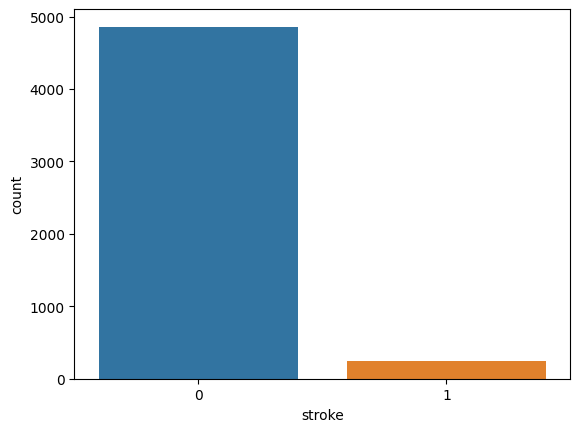

In [ ]:
sns.countplot(x='stroke', data=df)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Perform random under sampling
rus = RandomUnderSampler(random_state=0)
X_resampled, Y_resampled = rus.fit_resample(X, Y)

# Print the class distribution after under sampling
print("Class Distribution after Under Sampling:")
print(Y_resampled.value_counts())

Class Distribution after Under Sampling:
0    249
1    249
Name: stroke, dtype: int64


<Axes: xlabel='stroke', ylabel='count'>

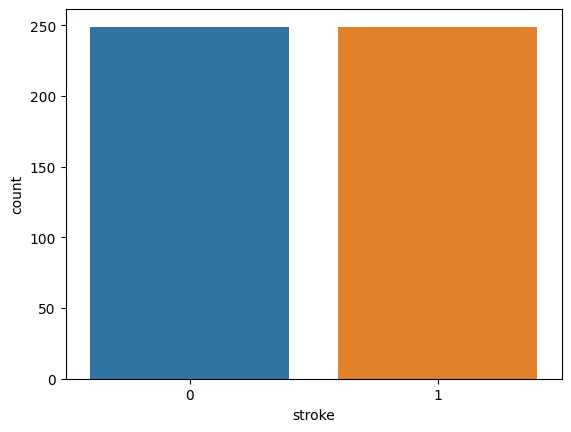

In [ ]:
sns.countplot(x=Y_resampled, data=X_resampled)

# Splitting Dataset into Testing and Training Sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42)

# Classification Models

Import Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow import keras

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss, roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Random Forest Classifier

Accuracy: 0.77
Log Loss: 0.585033351628168
AUC: 0.7857142857142857
MAE: 0.23
MSE: 0.23
R2 Score: 0.07963185274109652


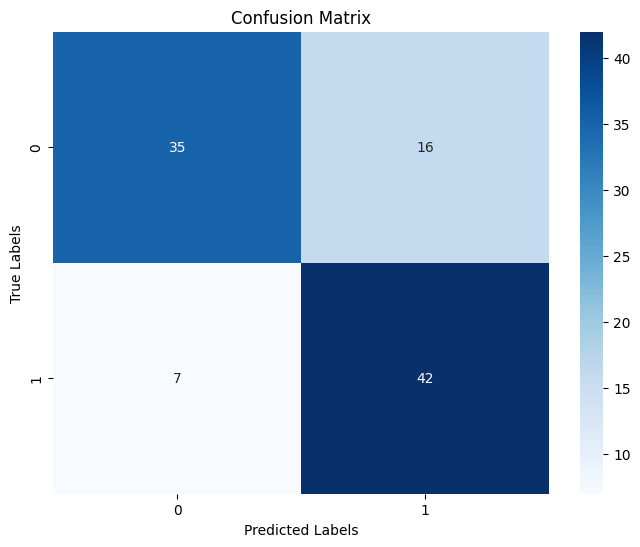


Classification report for test set
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        51
           1       0.72      0.86      0.79        49

    accuracy                           0.77       100
   macro avg       0.78      0.77      0.77       100
weighted avg       0.78      0.77      0.77       100



In [ ]:
# Random Forest Classifier
rfc = RandomForestClassifier(criterion="log_loss")
rfc.fit(X_train, y_train)

# Predict the class labels
y_pred1 = rfc.predict(X_test)

# Predict the class probabilities
y_pred_proba1 = rfc.predict_proba(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred1)

# Calculate log loss
logloss = log_loss(y_test, y_pred_proba1[:, 1])

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba1[:, 1])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred1)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred1)

# Calculate R2 score
r2 = r2_score(y_test, y_pred1)

print("Accuracy:", accuracy)
print("Log Loss:", logloss)
print("AUC:", auc)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred1)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print('\nClassification report for test set')
print(classification_report(y_test, y_pred1))

## Logistic Regression Classifier

Accuracy: 0.76
Log Loss: 0.5515913951809438
AUC: 0.7931172468987595
MAE: 0.24
MSE: 0.24
R2 Score: 0.03961584633853554


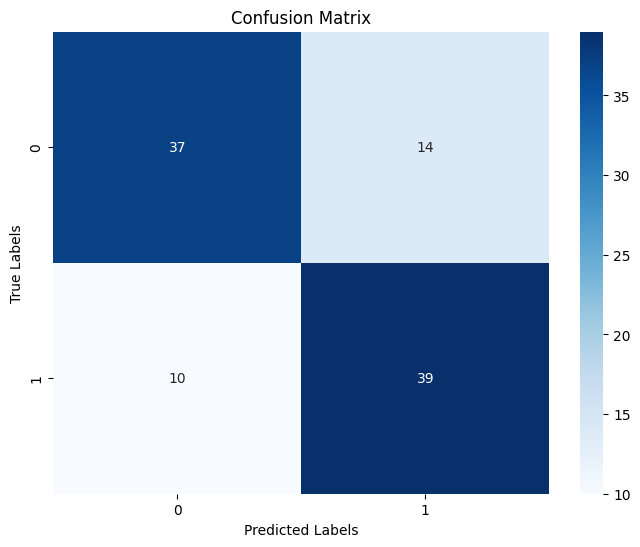


Classification report for test set
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        51
           1       0.74      0.80      0.76        49

    accuracy                           0.76       100
   macro avg       0.76      0.76      0.76       100
weighted avg       0.76      0.76      0.76       100



In [ ]:
# Logistic Regression Classifier
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)

# Predict the class labels
y_pred2 = lr.predict(X_test)

# Predict the class probabilities
y_pred_proba2 = lr.predict_proba(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred2)

# Calculate log loss
logloss = log_loss(y_test, y_pred_proba2[:, 1])

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba2[:, 1])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred2)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred2)

# Calculate R2 score
r2 = r2_score(y_test, y_pred2)

print("Accuracy:", accuracy)
print("Log Loss:", logloss)
print("AUC:", auc)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred2)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print('\nClassification report for test set')
print(classification_report(y_test, y_pred2))

## Gradient Boosting Classifier

Accuracy: 0.76
Log Loss: 0.6198993333675317
AUC: 0.7897158863545418
MAE: 0.24
MSE: 0.24
R2 Score: 0.03961584633853554


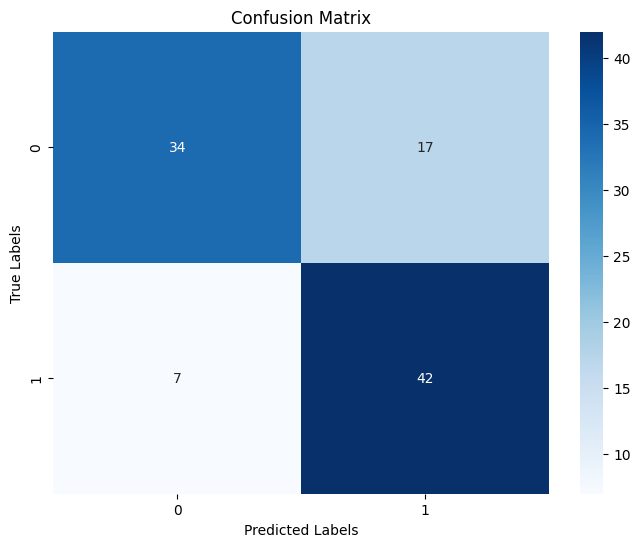


Classification report for test set
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        51
           1       0.71      0.86      0.78        49

    accuracy                           0.76       100
   macro avg       0.77      0.76      0.76       100
weighted avg       0.77      0.76      0.76       100



In [ ]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(loss="log_loss")
gbc.fit(X_train, y_train)

# Predict the class labels
y_pred3 = gbc.predict(X_test)

# Predict the class probabilities
y_pred_proba3 = gbc.predict_proba(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred3)

# Calculate log loss
logloss = log_loss(y_test, y_pred_proba3[:, 1])

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba3[:, 1])

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred3)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred3)

# Calculate R2 score
r2 = r2_score(y_test, y_pred3)

print("Accuracy:", accuracy)
print("Log Loss:", logloss)
print("AUC:", auc)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred3)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print('\nClassification report for test set')
print(classification_report(y_test, y_pred3))

# Visualisation

## ROC Curve

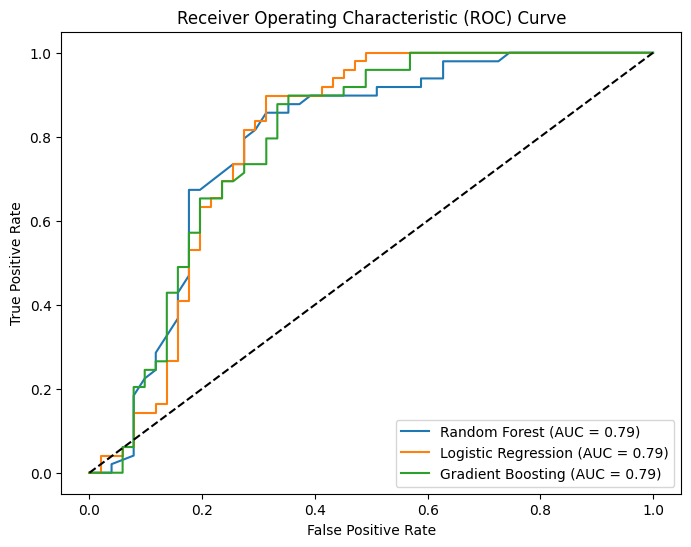

In [ ]:
# Calculate and plot ROC curve for each classifier
plt.figure(figsize=(8, 6))

# Random Forest Classifier
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_proba1[:, 1])
auc1 = roc_auc_score(y_test, y_pred_proba1[:, 1])
plt.plot(fpr1, tpr1, label='Random Forest (AUC = {:.2f})'.format(auc1))

# Logistic Regression Classifier
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_proba2[:, 1])
auc2 = roc_auc_score(y_test, y_pred_proba2[:, 1])
plt.plot(fpr2, tpr2, label='Logistic Regression (AUC = {:.2f})'.format(auc2))

# Gradient Boosting Classifier
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_proba3[:, 1])
auc3 = roc_auc_score(y_test, y_pred_proba3[:, 1])
plt.plot(fpr3, tpr3, label='Gradient Boosting (AUC = {:.2f})'.format(auc3))

# Set plot labels and title
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

## Precision-Recall Curve

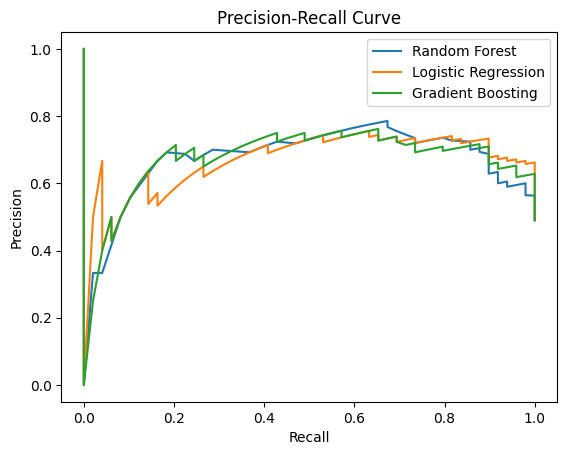

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall for each classifier
precision1, recall1, _ = precision_recall_curve(y_test, y_pred_proba1[:, 1])
precision2, recall2, _ = precision_recall_curve(y_test, y_pred_proba2[:, 1])
precision3, recall3, _ = precision_recall_curve(y_test, y_pred_proba3[:, 1])

# Plot precision-recall curve for each classifier
plt.plot(recall1, precision1, label='Random Forest')
plt.plot(recall2, precision2, label='Logistic Regression')
plt.plot(recall3, precision3, label='Gradient Boosting')

# Set plot labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Show the plot
plt.show()

## Accuracy Graph

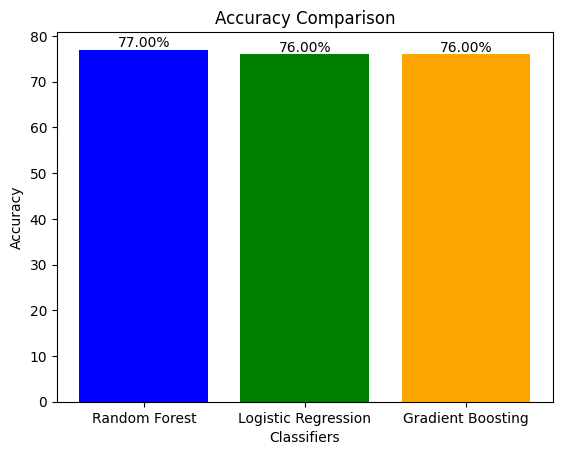

In [ ]:
# Define the accuracies of each classifier
# Calculate precision and recall for each classifier
accuracy_dt = accuracy_score(y_test, y_pred1)
accuracy_nb = accuracy_score(y_test, y_pred2)
accuracy_nn = accuracy_score(y_test, y_pred3)


accuracies = [
    round(accuracy_score(y_test, y_pred1) * 100, 2),
    round(accuracy_score(y_test, y_pred2) * 100, 2),
    round(accuracy_score(y_test, y_pred3) * 100, 2),
]

# Define the labels for each classifier
labels = ['Random Forest', 'Logistic Regression', 'Gradient Boosting']

# Plot the accuracy for each classifier
plt.bar(labels, accuracies, color=['blue', 'green', 'orange', 'red'])

# Set plot labels and title
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

# Add value labels to the bars
for i, v in enumerate(accuracies):
  plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')

# Show the plot
plt.show()